# Regresión Lineal Múltiple Mejorada: Predicción de Emisiones de CO₂

## ✅ 1. Objetivos

- Ampliar el modelo de regresión lineal múltiple anterior incorporando nuevas variables.
- Probar modelos no lineales como Árboles de Decisión y Random Forest.
- Evaluar y tratar outliers para mejorar la precisión.
- Aplicar validación cruzada para evaluar la generalización del modelo.


## ✅ 2. Carga y exploración de datos

### Cargar los datos

In [80]:
# Importar librerias
import pandas as pd
import numpy as np

In [81]:
file_path = '/content/drive/MyDrive/FuelConsumptionCo2.csv'
df = pd.read_csv(file_path)

In [82]:
# Mostrar las primeras 5 filas del dataframe con el método dataframe.head()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploración de datos

Usa df.describe() y df.info() para entender los datos.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [84]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Evaluación de datos faltantes

In [85]:
missing_values = df.isnull().sum()
print(missing_values)

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


### Explorar distribución y correlación entre las variables `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_COMB` y `CO2EMISSIONS`

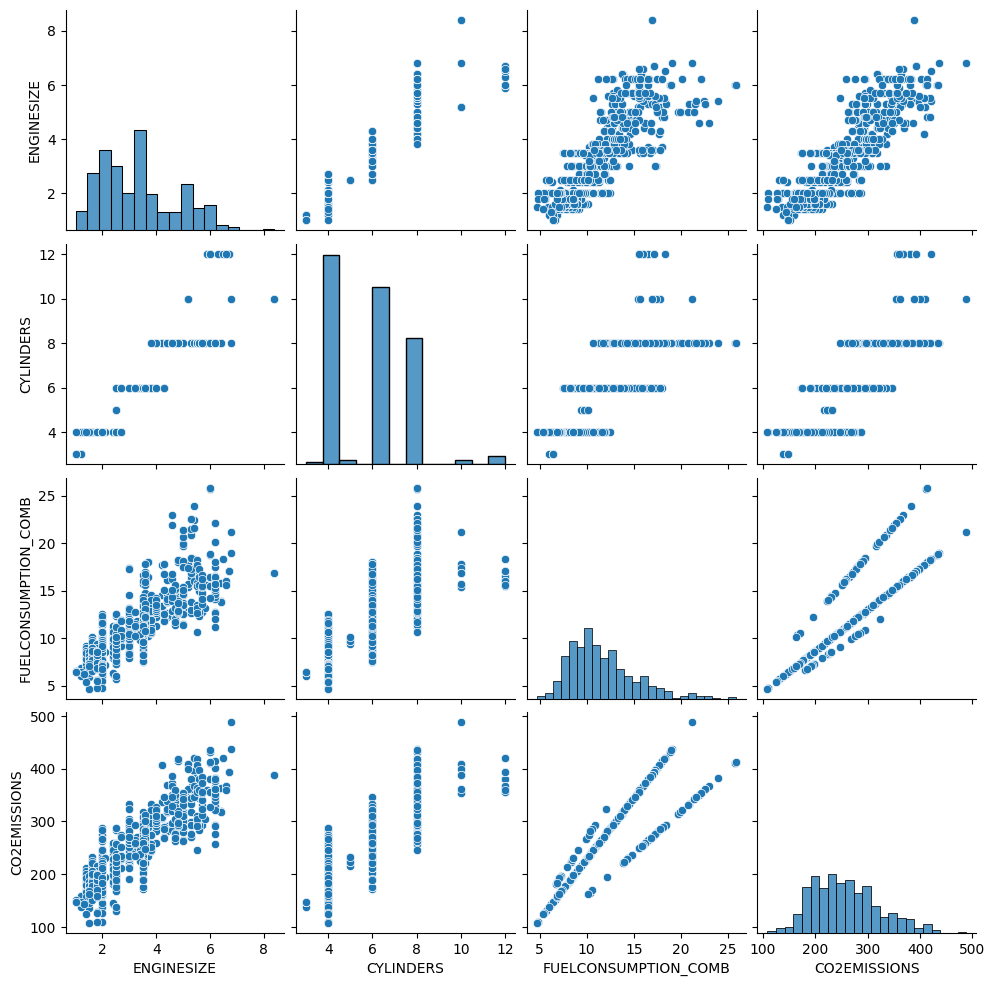

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']])
plt.show()

### Calcula la matriz de correlación para elegir las variables más relacionadas con `CO2EMISSIONS`.

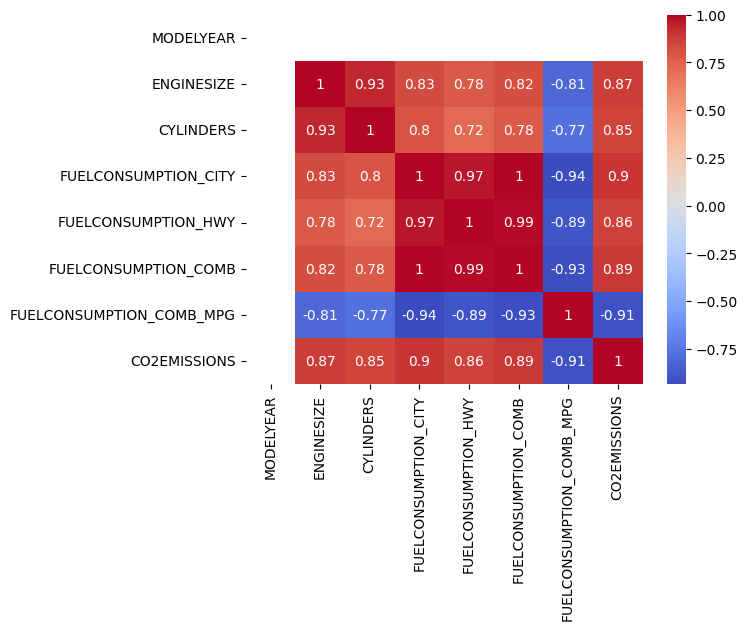

In [87]:
correlation = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## ✅ 3. Limpieza y tratamiento de outliers


Se analizarán las distribuciones y se eliminarán o transformarán valores atípicos que puedan afectar el rendimiento del modelo.


### 📊 Análisis de outliers mediante boxplots

En esta sección se generó una cuadrícula de boxplots para todas las variables numéricas del dataset con el objetivo de identificar visualmente la presencia de valores atípicos (outliers).

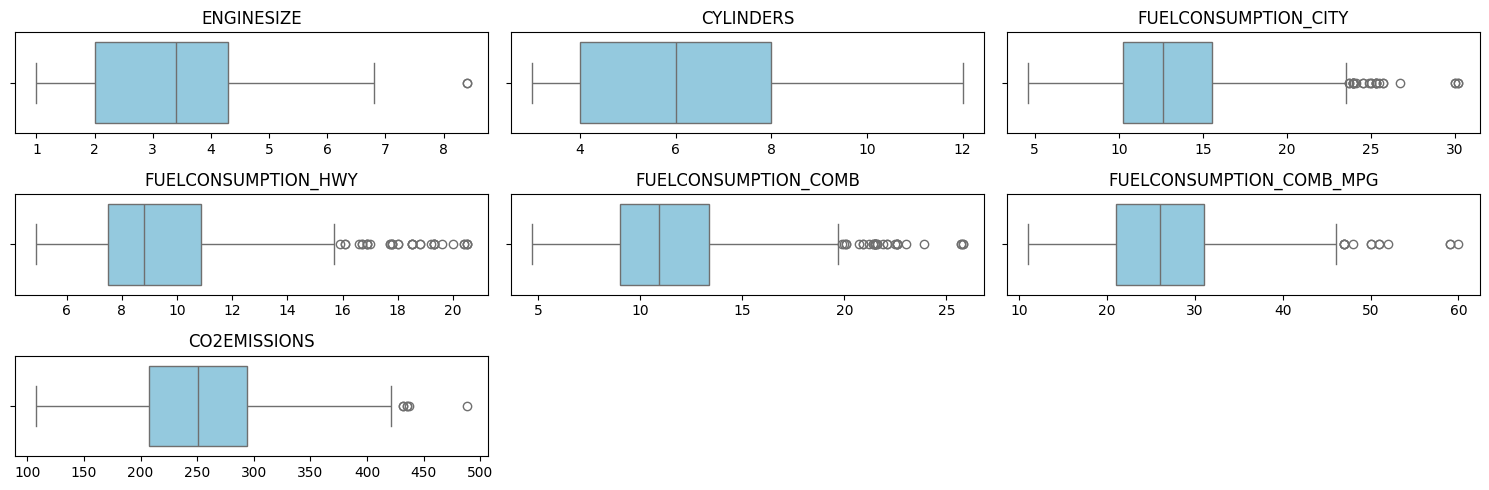

In [88]:
# Seleccionar las columnas numéricas para el gráfico
numerical_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Determina el número de filas y columnas de la cuadrícula para el diseño horizontal
n_rows = 3 # Puede ajustar el número de filas según sea necesario
n_cols = (len(numerical_cols) + n_rows - 1) // n_rows # Calcular el número de columnas necesarias

# Crea una figura y una cuadrícula de subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, 5)) # Ajustar el tamaño de la figura para el diseño horizontal

# Aplana la matriz de ejes para facilitar iteración
axes = axes.flatten()

# Crea un diagrama de caja para cada columna numérica en su subplot respectivo
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue') # Traza horizontalmente usando x
    axes[i].set_title(col) # Establece el título para cada subplot
    axes[i].set_xlabel('') # Elimina la etiqueta predeterminada del eje x

# Ocultar los subgráficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

🔍 <strong>Observaciones clave</strong>:

`ENGINESIZE` y `CYLINDERS` presentan valores extremos en el rango superior, correspondientes a vehículos con motores muy grandes o configuraciones poco comunes (*por ejemplo, 10 o 12 cilindros*).

Las variables de consumo de combustible (`FUELCONSUMPTION_CITY`, `HWY`, `COMB`) muestran una distribución sesgada hacia la derecha, con algunos vehículos que consumen significativamente más combustible que el promedio.

`CO2EMISSIONS` también presenta outliers en el extremo superior, lo cual es esperable en vehículos de alto rendimiento o gran tamaño.

Otras variables como `FUELCONSUMPTION_COMB_MPG` muestran outliers en el extremo inferior, lo que indica bajo rendimiento de combustible (*más emisiones*).

✅ <strong>Conclusión</strong>:

Este análisis visual respalda la necesidad de aplicar una técnica de limpieza como el método del rango intercuartílico (IQR) para eliminar estos valores extremos antes de entrenar los modelos. Esto ayudará a mejorar la estabilidad y precisión de las predicciones.

### 📊 Análisis de la Distribución de Variables Numéricas

El análisis visual de los histogramas nos permite entender la distribución de las características principales del conjunto de datos.

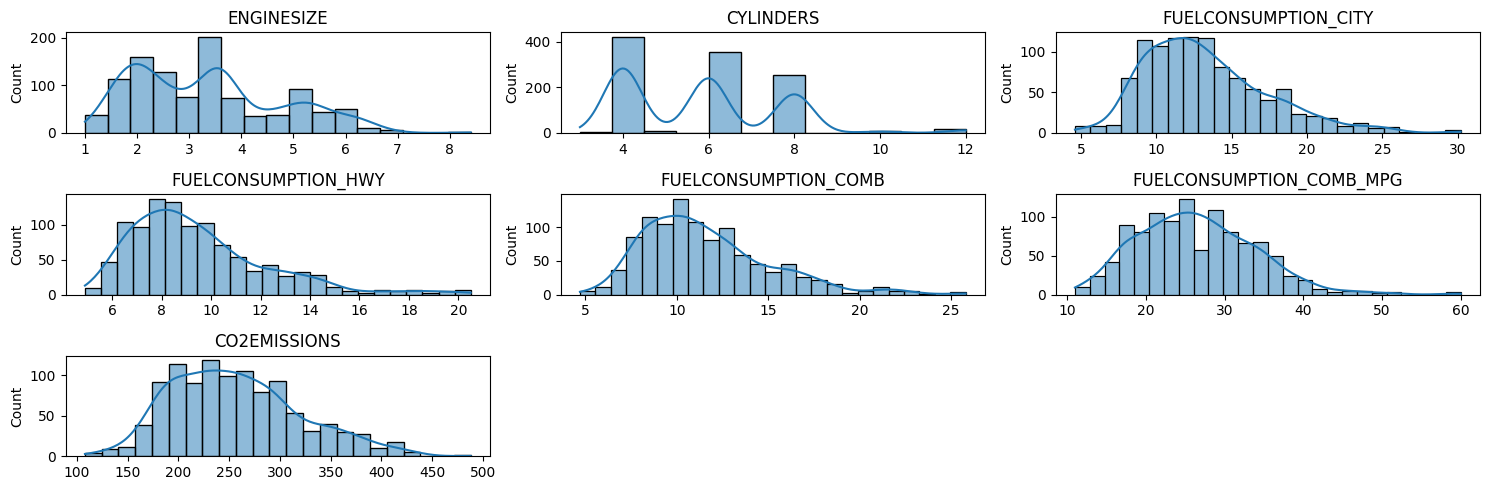

In [89]:
# Selecccionar las columnas numéricas
numerical_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Crear una cuadrícula de histogramas
n_rows = 3
n_cols = (len(numerical_cols) + n_rows - 1) // n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, 5))
axes = axes.flatten()

# Trazar un histograma para cada columna numérica en su subplot respectivo
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Ocultar los subgráficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<strong>Sesgo Predominante</strong> ➡️:

La mayoría de las variables continuas, como `ENGINESIZE`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`, `FUELCONSUMPTION_COMB` y `CO2EMISSIONS`, presentan un sesgo a la derecha (*sesgo positivo*). Esto indica que la mayoría de los vehículos en el dataset tienen motores de tamaño moderado, con consumos y emisiones relativamente bajos. Los valores altos son menos frecuentes.

<strong>Excepciones Notables</strong> ⚠️:

`FUELCONSUMPTION_COMB_MPG`: Esta variable muestra un sesgo a la izquierda (*sesgo negativo*) ⬅️. Esto es coherente, ya que las millas por galón (MPG) son una medida inversa al consumo L/100km. Un alto rendimiento en MPG corresponde a un bajo consumo.

`CYLINDERS`: Al ser una variable discreta, su distribución es multimodal, con picos claros en las categorías más comunes de 4, 6 y 8 cilindros.

<strong>Implicaciones</strong> 💡:

La presencia de sesgo en las variables es un factor importante a considerar para el preprocesamiento de datos. Para ciertos modelos de Machine Learning, podría ser beneficioso aplicar transformaciones (*ej. logarítmica*) para normalizar estas distribuciones.

### Limpieza y tratamiento de outliers

En esta sección aplicamos el método del rango intercuartílico (IQR) para detectar y eliminar valores atípicos en las variables numéricas del dataset. Esto ayuda a mejorar la precisión del modelo al reducir el impacto de valores extremos que podrían sesgar los resultados.

In [90]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Función para eliminar outliers usando el método IQR
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Aplicar la función al dataset
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Mostrar el número de filas antes y después de la limpieza
print(f"Número de filas antes de eliminar outliers: {df.shape[0]}")
print(f"Número de filas después de eliminar outliers: {df_cleaned.shape[0]}")


Número de filas antes de eliminar outliers: 1067
Número de filas después de eliminar outliers: 998


*Se eliminaron 69 registros con valores atípicos.*


## ✅ 4. Ingeniería de variables


Se codificarán variables categóricas como `FUELTYPE`, `TRANSMISSION` y `VEHICLECLASS` usando One-Hot Encoding.

In [91]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['FUELTYPE', 'TRANSMISSION', 'VEHICLECLASS'], dtype=int)
display(df_cleaned.head())

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,...,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER
0,2014,ACURA,ILX,2.0,4,9.9,6.7,8.5,33,196,...,0,0,0,0,0,0,0,0,0,0
1,2014,ACURA,ILX,2.4,4,11.2,7.7,9.6,29,221,...,0,0,0,0,0,0,0,0,0,0
3,2014,ACURA,MDX 4WD,3.5,6,12.7,9.1,11.1,25,255,...,0,0,0,0,0,1,0,0,0,0
4,2014,ACURA,RDX AWD,3.5,6,12.1,8.7,10.6,27,244,...,0,0,0,0,0,1,0,0,0,0
5,2014,ACURA,RLX,3.5,6,11.9,7.7,10.0,28,230,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1066
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MODELYEAR                              998 non-null    int64  
 1   MAKE                                   998 non-null    object 
 2   MODEL                                  998 non-null    object 
 3   ENGINESIZE                             998 non-null    float64
 4   CYLINDERS                              998 non-null    int64  
 5   FUELCONSUMPTION_CITY                   998 non-null    float64
 6   FUELCONSUMPTION_HWY                    998 non-null    float64
 7   FUELCONSUMPTION_COMB                   998 non-null    float64
 8   FUELCONSUMPTION_COMB_MPG               998 non-null    int64  
 9   CO2EMISSIONS                           998 non-null    int64  
 10  FUELTYPE_D                             998 non-null    int64  
 11  FUELTYPE_E

## ✅ 5. Preprocesamiento y escalado

Selecciona tus features (X) y la variable objetivo (y).
Aplica StandardScaler para normalizar los datos pero ahora con más features.

In [93]:
from sklearn.preprocessing import StandardScaler

features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
features = [col for col in features if col not in ['CO2EMISSIONS', 'MODELYEAR']]
target = 'CO2EMISSIONS'

X = df_cleaned[features]
y = df_cleaned[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## ✅ 6. División de datos

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## ✅ 7. Entrenamiento de modelos

- Regresión Lineal Múltiple (base)
- Regresión Polinómica
- Árbol de Decisión
- Random Forest

Regresión Lineal Múltiple (base)

In [95]:
from sklearn.linear_model import LinearRegression

LRM = LinearRegression()
LRM.fit(X_train, y_train)

LinearRegression()

Regresión Polinómica

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

PRM = LinearRegression()
PRM.fit(X_train_poly, y_train)

LinearRegression()

Árbol de Decisión

In [97]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## ✅ 8. Evaluación de modelos

Se utilizarán métricas como R², MAE, MSE y RMSE. También se aplicará validación cruzada para comparar el rendimiento.

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import cross_val_score

Regresión Lineal Múltiple (base)

In [100]:
y_pred_LRM = LRM.predict(X_test)

print("R²:", r2_score(y_test, y_pred_LRM))
print("MAE:", mean_absolute_error(y_test, y_pred_LRM))
print("MSE:", mean_squared_error(y_test, y_pred_LRM))
print("RMSE:", root_mean_squared_error(y_test, y_pred_LRM))

scores_LRM = cross_val_score(LRM, X_scaled, y, cv=5)
print("Validación Cruzada (R²):", scores_LRM.mean())

R²: 0.9947186921459527
MAE: 1.8035473806961366
MSE: 19.326853140868096
RMSE: 4.396231697814401
Validación Cruzada (R²): 0.9942108209747442


Regresión Polinómica

In [101]:
y_pred_PRM = PRM.predict(X_test_poly)

print("R²:", r2_score(y_test, y_pred_PRM))
print("MAE:", mean_absolute_error(y_test, y_pred_PRM))
print("MSE:", mean_squared_error(y_test, y_pred_PRM))
print("RMSE:", root_mean_squared_error(y_test, y_pred_PRM))

scores_PRM = cross_val_score(PRM, X_scaled, y, cv=5)
print("Validación Cruzada (R²):", scores_PRM.mean())

R²: 0.997452987127331
MAE: 0.9229639628514237
MSE: 9.320748780105633
RMSE: 3.0529901375709736
Validación Cruzada (R²): 0.9942108209747442


Árbol de Decisión

In [102]:
y_pred_DTR = DTR.predict(X_test)

print("R²:", r2_score(y_test, y_pred_DTR))
print("MAE:", mean_absolute_error(y_test, y_pred_DTR))
print("MSE:", mean_squared_error(y_test, y_pred_DTR))
print("RMSE:", root_mean_squared_error(y_test, y_pred_DTR))

scores_DTR = cross_val_score(DTR, X_scaled, y, cv=5)
print("Validación Cruzada (R²):", scores_DTR.mean())

R²: 0.9992157360833325
MAE: 0.39
MSE: 2.87
RMSE: 1.6941074346097416
Validación Cruzada (R²): 0.980611278360529


Random Forest

In [103]:
y_pred_RFR = RFR.predict(X_test)

print("R²:", r2_score(y_test, y_pred_RFR))
print("MAE:", mean_absolute_error(y_test, y_pred_RFR))
print("MSE:", mean_squared_error(y_test, y_pred_RFR))
print("RMSE:", root_mean_squared_error(y_test, y_pred_RFR))

scores_RFR = cross_val_score(RFR, X_scaled, y, cv=5)
print("Validación Cruzada (R²):", scores_RFR.mean())

R²: 0.9978510157611361
MAE: 0.9259999999999993
MSE: 7.864170000000006
RMSE: 2.8043127500334206
Validación Cruzada (R²): 0.9857365180681814


## ✅ 9. Comparación de resultados

### Tabla para comparativo entre modelos.

In [104]:
def compare_models(models, X_train, y_train, X_test, y_test, X_train_poly, X_test_poly):
    results = []
    for name, model in models.items():
        # Train the model with the correct feature set
        if name == 'Regresión Polinómica':
            model.fit(X_train_poly, y_train)
        else:
            model.fit(X_train, y_train)

        # Make predictions based on the model type and test features
        if name == 'Regresión Polinómica':
            y_pred = model.predict(X_test_poly)
        else:
            y_pred = model.predict(X_test)

        # Calculate test set metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        cross_val_r2 = cross_val_score(model, X_scaled, y, cv=5).mean()

        # Append results
        results.append([name, r2, mae, mse, rmse, cross_val_r2])

    results_df = pd.DataFrame(results, columns=['Modelo', 'R²', 'MAE', 'MSE', 'RMSE', 'Cross-Validation R²'])
    return results_df

models = {
    'Regresión Lineal Múltiple (base)': LRM,
    'Regresión Polinómica': PRM,
    'Árboles de Decisión': DTR,
    'Random Forest': RFR
}
# Call the function with all necessary training and test data
results_df = compare_models(models, X_train, y_train, X_test, y_test, X_train_poly, X_test_poly)
display(results_df)

,Modelo,R²,MAE,MSE,RMSE,Cross-Validation R²
0,Regresión Lineal Múltiple (base),0.994719,1.803547,19.326853,4.396232,0.994211
1,Regresión Polinómica,0.997453,0.922964,9.320749,3.052990,0.994211
2,Árboles de Decisión,0.999216,0.390000,2.870000,1.694107,0.980611
3,Random Forest,0.997851,0.926000,7.864170,2.804313,0.985737


### 📊 Gráfico de Barras Agrupadas


Este gráfico muestra claramente cómo se comporta cada modelo en cada métrica:

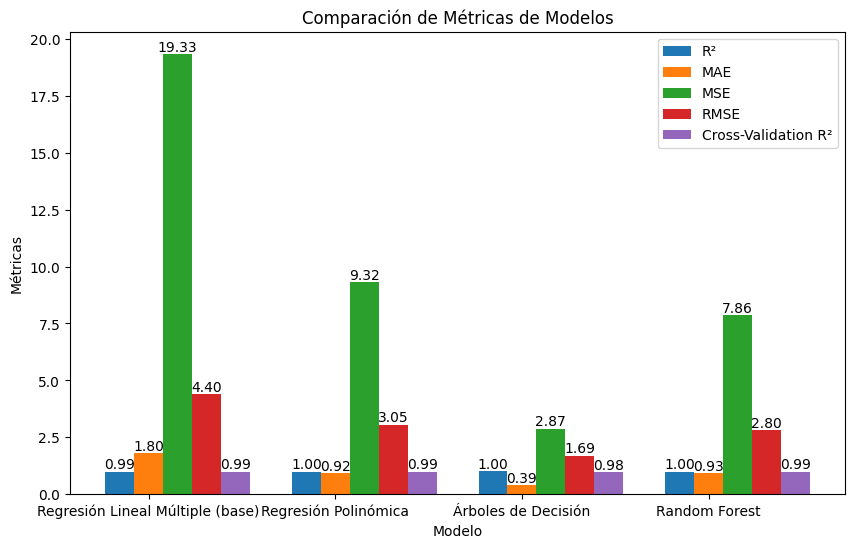

In [105]:
# Gráfico de Barras Agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.155

for i, metric in enumerate(['R²', 'MAE', 'MSE', 'RMSE', 'Cross-Validation R²']):
    ax.bar(x + i * width, results_df[metric], width, label=metric)

    # Agregar valores en las barras
    for j, value in enumerate(results_df[metric]):
        ax.text(x[j] + i * width, value, f'{value:.2f}', ha='center', va='bottom')

ax.set_xlabel('Modelo')
ax.set_ylabel('Métricas')
ax.set_title('Comparación de Métricas de Modelos')
ax.set_xticks(x + width)
ax.set_xticklabels(results_df['Modelo'])
ax.legend()

plt.show()

### 🕸️ Gráfico de Radar (Spider Chart)

Este gráfico permite ver de forma intuitiva qué tan equilibrado es el rendimiento de cada modelo en todas las métricas (normalizadas):

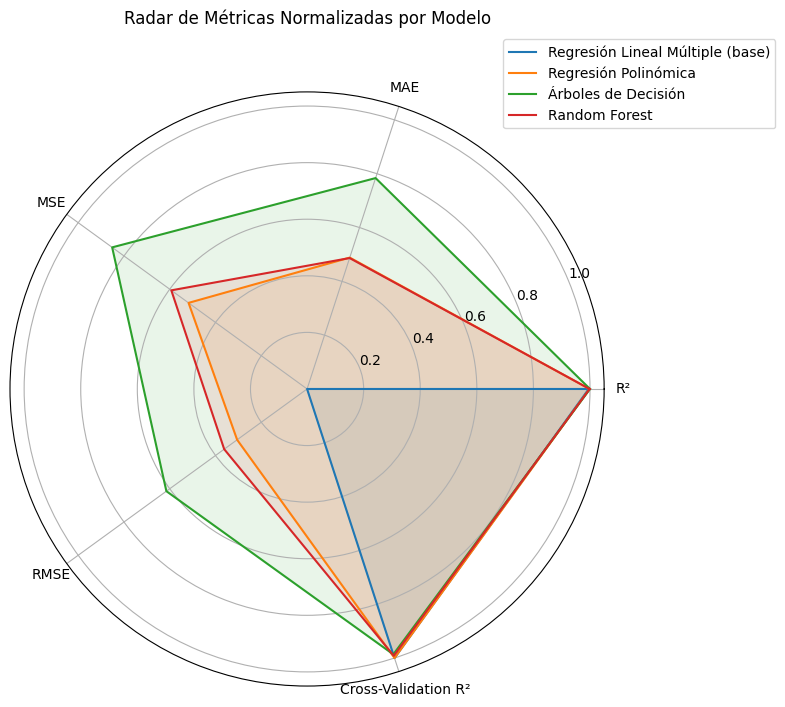

In [106]:
from math import pi

# Copiar el DataFrame original
df_radar = results_df.copy()

# Normalizar e invertir las métricas de error (para que 1 sea mejor)
df_radar['MAE'] = 1 - df_radar['MAE'] / df_radar['MAE'].max()
df_radar['MSE'] = 1 - df_radar['MSE'] / df_radar['MSE'].max()
df_radar['RMSE'] = 1 - df_radar['RMSE'] / df_radar['RMSE'].max()

# Normalizar R²
df_radar['R²'] = df_radar['R²'] / df_radar['R²'].max()

# Normalizar Validación Cruzada R²:
df_radar['Cross-Validation R²'] = df_radar['Cross-Validation R²'] / df_radar['Cross-Validation R²'].max()

# Seleccionar las métricas a graficar (en orden de preferencia visual)
metricas = ['R²', 'MAE', 'MSE', 'RMSE', 'Cross-Validation R²']

# Etiquetas y ángulos
labels = metricas
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Cerrar el círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Graficar cada modelo
for i, row in df_radar.iterrows():
    valores = row[metricas].tolist()
    valores += valores[:1]  # Cerrar el círculo
    ax.plot(angles, valores, label=row['Modelo'])
    ax.fill(angles, valores, alpha=0.1)

# Configurar etiquetas y título
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Radar de Métricas Normalizadas por Modelo', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

### 🧠 <strong>Observaciones</strong>:

<br>**Árbol de Decisión destaca** con el mejor R² y los errores más bajos en el conjunto de prueba, pero su validación cruzada es la más baja, lo que sugiere posible sobreajuste ⚠️.
</br>
<br>
**Random Forest ofrece** un excelente equilibrio entre precisión y generalización, siendo una opción muy robusta 💪.</br>
<br>
**Regresión Polinómica** mejora significativamente respecto a la lineal, especialmente en MAE y MSE, sin perder capacidad de generalización 🎯.</br>
<br>
**Regresión Lineal Múltiple**, aunque es la más simple, muestra un rendimiento sólido, pero claramente superado por los modelos más complejos 📉.</br>

## ✅ 10. Conclusiones y recomendaciones

### ✅ Conclusiones

Tras ampliar el preprocesamiento y enriquecer el conjunto de características, se evaluaron múltiples modelos de regresión. A continuación, se resumen las principales conclusiones:

🔍 Comparación de Modelos

<br>**Regresión Lineal Múltiple**: Aunque fue el modelo base, su rendimiento fue superado por modelos más complejos. Sin embargo, sigue siendo útil como referencia por su simplicidad y rapidez de entrenamiento.</br>

<br>**Regresión Polinómica**: Mostró una mejora significativa en precisión respecto al modelo lineal, especialmente en MAE y MSE. Es una buena opción cuando se sospecha de relaciones no lineales entre las variables.</br>

<br>**Árbol de Decisión**: Obtuvo el mejor desempeño en el conjunto de prueba, pero su baja puntuación en validación cruzada sugiere un posible sobreajuste. Ideal para exploración inicial o cuando se requiere interpretabilidad.</br>

<br>**Random Forest**: Ofreció el mejor equilibrio entre precisión y capacidad de generalización. Es el modelo más robusto y confiable en este análisis, recomendado para producción o toma de decisiones.</br>

📌 Recomendaciones

<br>Para aplicaciones donde la precisión es crítica, se recomienda utilizar **Random Forest**.</br>

<br>Si se busca un modelo explicable y rápido, la **Regresión Lineal Múltiple** sigue siendo válida.</br>

<br>Se sugiere realizar una búsqueda de hiperparámetros (**GridSearchCV** o **RandomizedSearchCV**) para afinar aún más los modelos más complejos.</br>

<br>Considerar técnicas de reducción de dimensionalidad o selección de características si el número de variables sigue creciendo.</br>